Valor de la propina: 
19.847607361963192


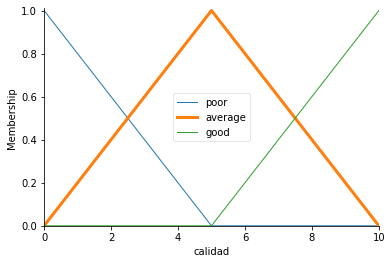

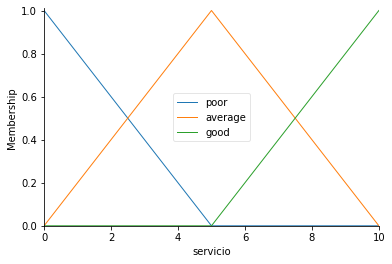

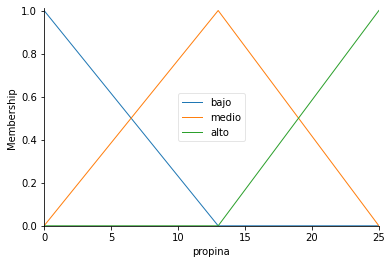

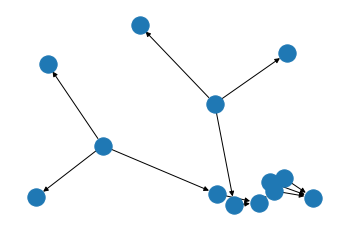

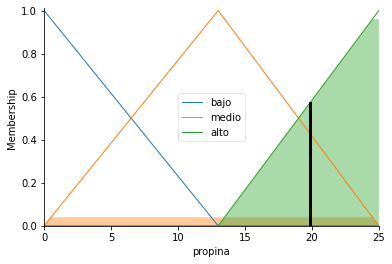

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
%matplotlib inline

calidad = ctrl.Antecedent(np.arange(0, 11, 1), 'calidad')
servicio = ctrl.Antecedent(np.arange(0, 11, 1), 'servicio')
propina = ctrl.Consequent(np.arange(0, 26, 1), 'propina')

calidad.automf(3)
servicio.automf(3)

propina['bajo'] = fuzz.trimf(propina.universe, [0, 0, 13])
propina['medio'] = fuzz.trimf(propina.universe, [0, 13, 25])
propina['alto'] = fuzz.trimf(propina.universe, [13, 25, 25])

calidad['average'].view()
servicio.view()
propina.view()

regla1 = ctrl.Rule(calidad['poor'] | servicio['poor'], propina['bajo'])
regla2 = ctrl.Rule(servicio['average'], propina['medio'])
regla3 = ctrl.Rule(servicio['good'] | calidad['good'], propina['alto'])

regla1.view()

control_propina = ctrl.ControlSystem([regla1, regla2, regla3])
asignacion_propina = ctrl.ControlSystemSimulation(control_propina)

asignacion_propina.input['calidad'] = 6.5
asignacion_propina.input['servicio'] = 9.8

asignacion_propina.compute()

print("Valor de la propina: ")
print(asignacion_propina.output['propina'])

propina.view(sim=asignacion_propina)